In [2]:
#💼 Cenário empresarial simulado
#🏭 Empresa: InduTech Solutions
#📍 Setor: Manutenção Industrial
#👤 Responsável técnico: Eng. Carla Ramos
#📄 Documento: Solicitação Interna de Análise
#📬 Solicitação Oficial – Análise de Dados Operacionais de Manutenção
#Prezado analista,
#Com o objetivo de identificar padrões de falha e otimizar os ciclos de manutenção preventiva, solicitamos a análise dos dados operacionais coletados dos equipamentos industriais da linha de produção.
#O dataset em anexo contém registros de sensores e status operacionais de diferentes equipamentos. Esperamos que sua análise nos ajude a responder às seguintes perguntas:
#🎯 Objetivos da análise:
#Identificar quais equipamentos apresentam maior frequência de falhas e sua distribuição ao longo do tempo de uso.
#Analisar a relação entre erros de sensor e falhas de equipamento: erros prévios podem prever falhas?
#Calcular a média de horas de uso antes de um evento de manutenção, por equipamento.
#Verificar a relação entre temperatura e status da máquina — temperaturas elevadas estão relacionadas a falhas?
#Gerar visualizações para apresentação executiva, incluindo:
#Gráfico de barras comparando taxa de falhas por equipamento
#Boxplot de temperatura por status (OK/Falha)
#Gráfico de dispersão entre horas de uso e temperatura, colorido por status
#📌 Entrega esperada:
#Um relatório técnico (Jupyter Notebook) com insights claros e visuais bem comentados.
#Conclusões por tópico com recomendações sempre que possível.
#Se necessário, sugestões de limpeza ou tratamento dos dados.
#Prazo sugerido: até 2 dias úteis após recebimento do arquivo.
#Atenciosamente,
#Eng. Carla Ramos
#Coordenadora Técnica – InduTech Solutions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carregar planilha de dados
df = pd.read_csv("D:/Projetos/projetos-em-ia-e-analise/dados/dados_manutencao.csv")

#Mostrar informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_equipamento     300 non-null    object 
 1   horas_uso          290 non-null    float64
 2   temperatura        290 non-null    float64
 3   erro_sensor        300 non-null    int64  
 4   evento_manutencao  279 non-null    object 
 5   status             300 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [4]:
#Mostra as primeiras linhas da tabela
df.head()

,id_equipamento,horas_uso,temperatura,erro_sensor,evento_manutencao,status
0,EQUIP_4,NaN,72.305932,0,Não,OK
1,EQUIP_5,3075.0,61.797668,0,Sim,OK
2,EQUIP_4,3775.0,63.021221,0,Não,OK
3,EQUIP_3,2182.0,68.481639,0,Não,OK
4,EQUIP_1,243.0,97.706929,0,Não,Falha


In [5]:
#Estatísticas descritivas
#contar, média, mediana, mínimo, 25%, 50%(igual a mediana), 75%, máximo
#Soma através de contagem numérica
df.describe()

,horas_uso,temperatura,erro_sensor
count,290.000000,290.000000,300.000000
mean,2585.906897,74.228370,0.223333
std,1339.893295,10.247407,0.417176
min,104.000000,48.031134,0.000000
25%,1344.750000,67.126900,0.000000
50%,2791.000000,74.019248,0.000000
75%,3640.000000,81.302989,0.000000
max,4969.000000,105.788808,1.000000


In [6]:
df.isnull().sum()

id_equipamento        0
horas_uso            10
temperatura          10
erro_sensor           0
evento_manutencao    21
status                0
dtype: int64

In [7]:
df = df.dropna(subset=["temperatura", "horas_uso", "evento_manutencao"])


In [8]:
df.isnull().sum()


id_equipamento       0
horas_uso            0
temperatura          0
erro_sensor          0
evento_manutencao    0
status               0
dtype: int64

In [9]:
df.groupby("id_equipamento")["horas_uso"].agg(["mean", "std", "min"])


,mean,std,min
id_equipamento,,,
EQUIP_1,2557.655738,1360.351644,233.0
EQUIP_2,2590.476190,1408.080656,104.0
EQUIP_3,2866.777778,1308.194920,495.0
EQUIP_4,2243.379310,1322.131265,219.0
EQUIP_5,2719.600000,1301.880744,214.0


In [10]:
#Quais equipamentos apresentaram mais ocorrências de falha
df_status = df[df["status"] == "Falha"].groupby("id_equipamento").count()
df_status.head()

,horas_uso,temperatura,erro_sensor,evento_manutencao,status
id_equipamento,,,,,
EQUIP_1,5,5,5,5,5
EQUIP_2,7,7,7,7,7
EQUIP_3,10,10,10,10,10
EQUIP_4,6,6,6,6,6
EQUIP_5,5,5,5,5,5


In [11]:
#Mostrar contagem de falhas
df_status_falhas = df[df["status"] == "Falha"].groupby("id_equipamento").size().sort_values(ascending=False)
display(df_status_falhas)

id_equipamento
EQUIP_3    10
EQUIP_2     7
EQUIP_4     6
EQUIP_1     5
EQUIP_5     5
dtype: int64

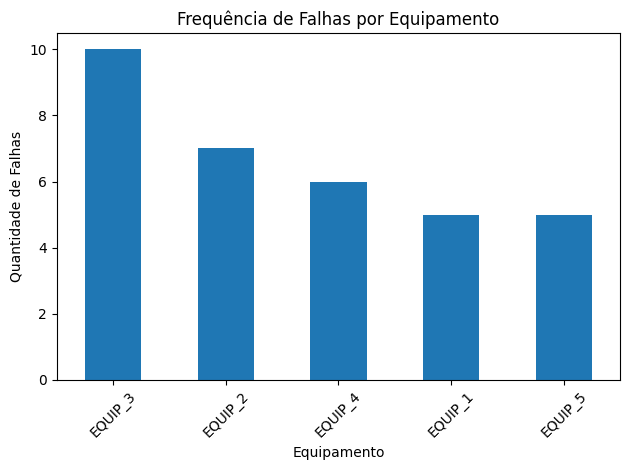

In [12]:
df_status_falhas.plot(kind="bar", title="Frequência de Falhas por Equipamento")
plt.ylabel("Quantidade de Falhas")
plt.xlabel("Equipamento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#Dar valores para variáveis alfabéticas
df["valores"] = df["status"].map({"OK": 0, "Falha": 1})
df[["erro_sensor", "valores"]].corr()

,erro_sensor,valores
erro_sensor,1.000000,-0.146185
valores,-0.146185,1.000000


<Axes: >

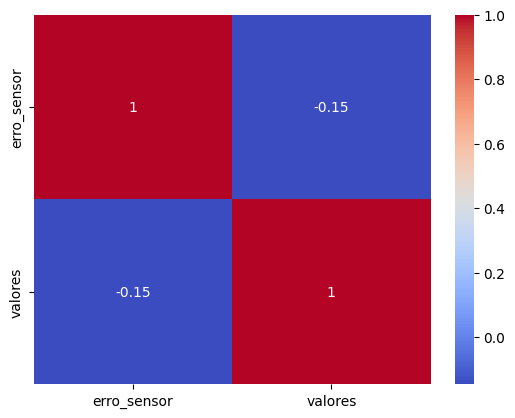

In [14]:
#correlação entre duas variáveis numéricas - Modelométodo padrão de Pearson 
sns.heatmap(df[["erro_sensor", "valores"]].corr(), annot=True, cmap="coolwarm")

In [15]:
#📉 O que isso significa?
#Valor negativo: quando erro_sensor está presente (1), há uma leve tendência a não haver falha.
#Valor próximo de zero (-0.15): a correlação é fraca ou quase inexistente.
#💡 Conclusão: com os dados disponíveis, a presença de erro do sensor não está fortemente associada a falhas.


In [16]:
#Isso mostra quantos erros de sensor realmente levaram a falhas, em % por linha.
pd.crosstab(df["erro_sensor"], df["valores"], normalize="index")


valores,0,1
erro_sensor,,
0,0.847291,0.152709
1,0.964912,0.035088


In [17]:
#Isso mostra a proporção de falhas quando há erro (1) ou não (0).
df.groupby("erro_sensor")["valores"].mean()


erro_sensor
0    0.152709
1    0.035088
Name: valores, dtype: float64

<Axes: xlabel='erro_sensor', ylabel='valores'>

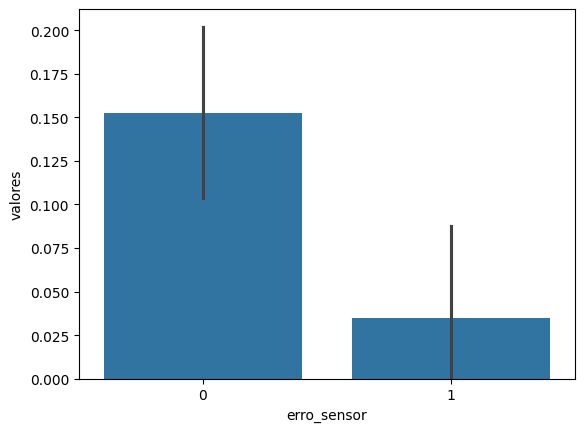

In [18]:
sns.barplot(x="erro_sensor", y="valores", data=df)

In [19]:
df["evento"] = df["evento_manutencao"].map({"Não": 0, "Sim": 1})

#Calcular a média de horas_uso quando houve evento (evento == 1):

df[df["evento"] == 1].groupby("id_equipamento")["horas_uso"].mean().sort_values(ascending=False)

id_equipamento
EQUIP_2    3295.125000
EQUIP_3    3059.333333
EQUIP_5    2625.000000
EQUIP_1    2231.473684
EQUIP_4    2032.454545
Name: horas_uso, dtype: float64

<Axes: xlabel='id_equipamento', ylabel='horas_uso'>

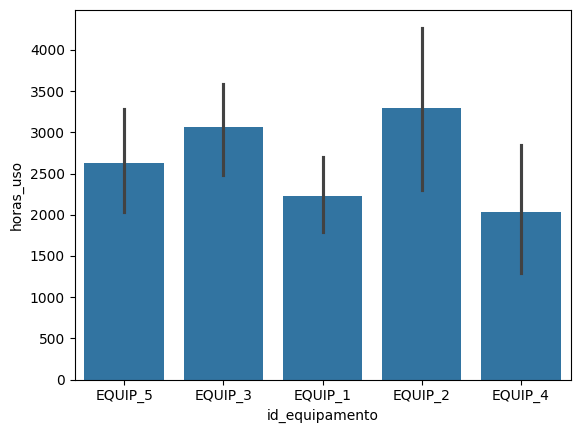

In [20]:
sns.barplot(x="id_equipamento", y="horas_uso", data=df[df["evento"] == 1])

In [21]:
#Dar valores para variáveis alfabéticas
df["maquina"] = df["status"].map({"OK": 0, "Falha": 1})
df[["temperatura", "maquina"]].corr()

,temperatura,maquina
temperatura,1.000000,-0.002522
maquina,-0.002522,1.000000


<Axes: >

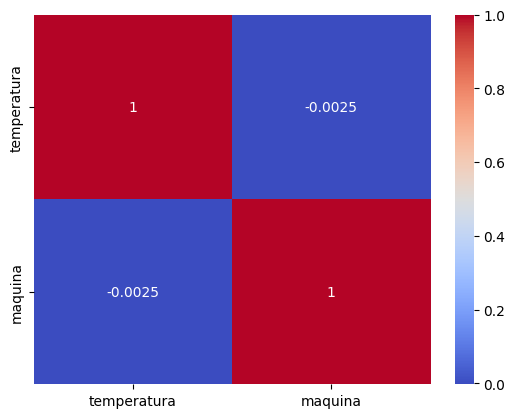

In [22]:
#correlação entre duas variáveis numéricas - Modelométodo padrão de Pearson 
sns.heatmap(df[["temperatura", "maquina"]].corr(), annot=True, cmap="coolwarm")

In [23]:
df["valores"] = df["status"].map({"OK": 0, "Falha": 1})
df["evento"] = df["evento_manutencao"].map({"Não": 0, "Sim": 1})
df["status_bin"] = df["status"].map({"OK": "OK", "Falha": "Falha"})

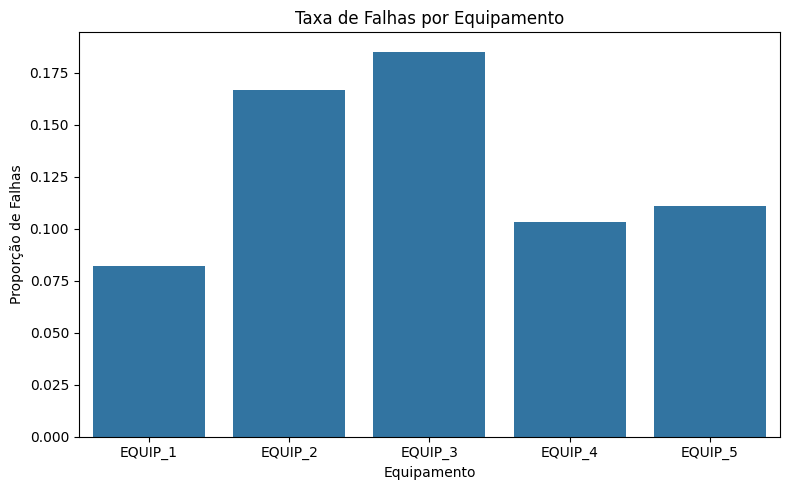

In [24]:
falhas = df[df["status"] == "Falha"].groupby("id_equipamento").size()
total = df.groupby("id_equipamento").size()
taxa_falha = (falhas / total).fillna(0)

# Gráfico 1: Barras – Taxa de falhas por equipamento
plt.figure(figsize=(8,5))
sns.barplot(x=taxa_falha.index, y=taxa_falha.values)
plt.title("Taxa de Falhas por Equipamento")
plt.ylabel("Proporção de Falhas")
plt.xlabel("Equipamento")
plt.tight_layout()


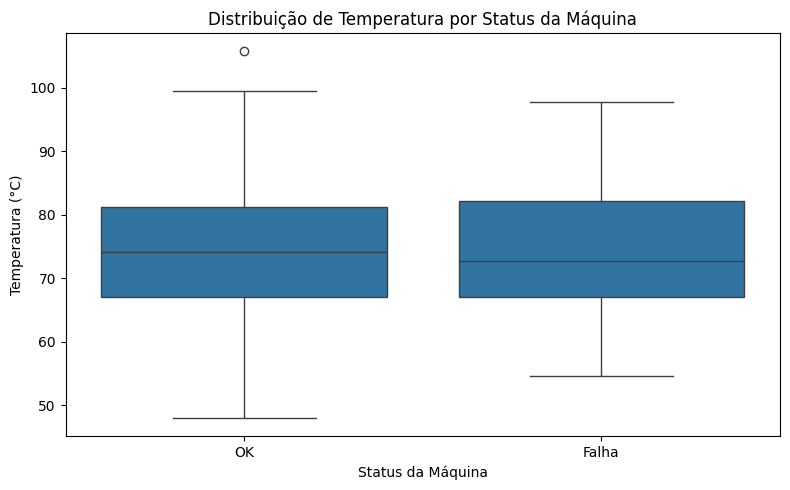

In [25]:
# Gráfico 2: Boxplot – Temperatura por status
df["status_bin"] = df["status"].map({"OK": "OK", "Falha": "Falha"})
plt.figure(figsize=(8,5))
sns.boxplot(x="status_bin", y="temperatura", data=df)
plt.title("Distribuição de Temperatura por Status da Máquina")
plt.xlabel("Status da Máquina")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()

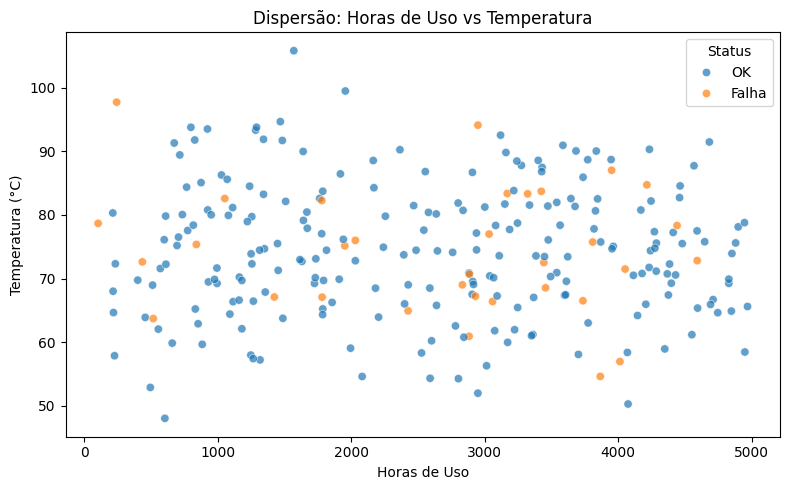

In [26]:
# Gráfico 3: Dispersão – Horas x Temperatura (colorido por status)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="horas_uso", y="temperatura", hue="status", alpha=0.7)
plt.title("Dispersão: Horas de Uso vs Temperatura")
plt.xlabel("Horas de Uso")
plt.ylabel("Temperatura (°C)")
plt.legend(title="Status")
plt.tight_layout()